In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
docs = ['why hello there', 'omg hello pony', 'she went there? omg']
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

   hello  omg  pony  she  there  went  why
0      1    0     0    0      1     0    1
1      1    1     1    0      0     0    0
2      0    1     0    1      1     1    0


In [3]:
train_list = []
train_label = []
for label in os.listdir("C50/C50train"):
    for file in os.listdir("C50/C50train/" + label):
        with open(os.path.join("C50/C50train/",label, file), "r") as f:
            text = f.read()
            train_list.append(text)
            train_label.append(label)

In [4]:
test_list = []
test_label = []
for label in os.listdir("C50/C50test"):
    for file in os.listdir("C50/C50test/" + label):
        with open(os.path.join("C50/C50test/",label, file), "r") as f:
            text = f.read()
            test_list.append(text)
            test_label.append(label)

In [14]:
docs = train_list + test_list
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [33]:
df.shape

(5000, 39515)

In [6]:
df.head()

,00,000,0000,00005,0003,000th,0015,002,003,004,...,zurich,zuyao,zuzana,zwanziger,zwetchenbaum,zwetchkenbaum,zx2,zygmunt,zyprexa,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.drop([col for col, val in df.iloc[:2500,:].sum().iteritems() if val < 30], axis=1, inplace=True)
df.shape

(5000, 3946)

In [19]:
df['label'] = train_label + test_label
df['label'] = df['label'].astype('category')
df.shape

(5000, 3947)

In [18]:
train_label[:10]

['RobinSidel',
 'RobinSidel',
 'RobinSidel',
 'RobinSidel',
 'RobinSidel',
 'RobinSidel',
 'RobinSidel',
 'RobinSidel',
 'RobinSidel',
 'RobinSidel']

In [21]:
df.sum(axis=0)

00         122
000       3158
0003       134
02          79
04          68
          ... 
zeneca      58
zhang      105
zhou        92
zhu         50
zinc       182
Length: 3946, dtype: int64

In [25]:
import nltk
from nltk.corpus import stopwords
df.drop(columns=[w for w in df.columns if w in stopwords.words('english')], inplace=True)
df.shape

(5000, 3823)

In [32]:
df.sum(axis=0).sort_values()[-10:]

billion     6277
market      6581
china       6625
new         6902
company     7523
million     9895
would      10277
year       10553
percent    10915
said       39984
dtype: int64

In [34]:
X_train, y_train, X_test, y_test = df.iloc[:2500,:-1], df.iloc[:2500, -1], df.iloc[2500:, :-1], df.iloc[2500:, -1]

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

sts = StandardScaler()
X = sts.fit_transform(X_train)
y = y_train.values

In [39]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svm = SVC(gamma="auto")
logi = LogisticRegression(solver="lbfgs", multi_class="multinomial",C=1)

models = [svm, logi]

In [40]:
from sklearn.model_selection import cross_val_score

for clf in models:
    scores = cross_val_score(clf, X, y, scoring="accuracy", cv=5)
    print(clf.__class__.__name__, np.mean(scores), np.std(scores))

SVC 0.7708 0.005600000000000005


/Users/Eddie/Desktop/MachineLearning/handsOn/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Eddie/Desktop/MachineLearning/handsOn/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


LogisticRegression 0.8512000000000001 0.008908422980528043


/Users/Eddie/Desktop/MachineLearning/handsOn/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
X_train.shape

(2500, 3822)

In [83]:
from sklearn.decomposition import TruncatedSVD

k = 200
X_svd = TruncatedSVD(n_components=k)

In [84]:
X_svd.fit(X_train.values)

TruncatedSVD(n_components=200)

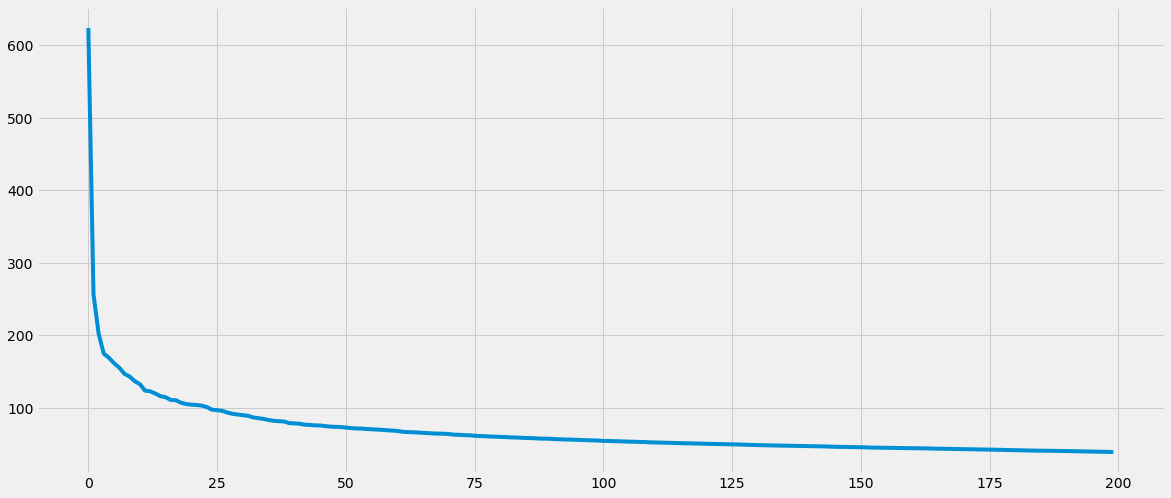

In [85]:
import os, sys, math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

plt.plot(range(len(X_svd.singular_values_)), X_svd.singular_values_) 

In [86]:
X_svd.components_.shape

(200, 3822)

In [87]:
factors = X_train.values @ X_svd.components_.T

In [88]:
def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R), R

In [89]:
vari = varimax(factors, q=k)

In [90]:
vari[1].shape

(200, 200)

In [91]:
for clf in models:
    scores = cross_val_score(clf, vari[0], y, scoring="accuracy", cv=5)
    print(clf.__class__.__name__, np.mean(scores), np.std(scores))

SVC 0.7448 0.024709512338368822
LogisticRegression 0.7816000000000001 0.010836973747315263


In [110]:
col = 10
nrow = 50
y_train[np.argsort(vari[0][:,col])[::-1][:nrow]].value_counts()

MatthewBunce         37
LynneO'Donnell        7
LynnleyBrowning       3
JanLopatka            2
TanEeLyn              1
WilliamKazer          0
HeatherScoffield      0
KarlPenhaul           0
JonathanBirt          0
JohnMastrini          0
JoeOrtiz              0
JoWinterbottom        0
JimGilchrist          0
JaneMacartney         0
GrahamEarnshaw        0
KevinDrawbaugh        0
FumikoFujisaki        0
EricAuchard           0
EdnaFernandes         0
DavidLawder           0
DarrenSchuettler      0
BradDorfman           0
BernardHickey         0
BenjaminKangLim       0
AlexanderSmith        0
AlanCrosby            0
KeithWeir             0
KirstinRidley         0
KevinMorrison         0
ToddNissen            0
TimFarrand            0
TheresePoletti        0
SimonCowell           0
ScottHillis           0
SarahDavison          0
SamuelPerry           0
RogerFillion          0
RobinSidel            0
PierreTran            0
PeterHumphrey         0
PatriciaCommins       0
NickLouth       